In [2]:
import numpy as np

# sorting along row or columns:

rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [3]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [4]:
# sort each row of X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

In [6]:
# Partial Sorts: Partitioning: smaller values to the left, greater - to the right

x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [18]:
##### Example: k-Nearest Neighbors

X = rand.rand(40, 2)

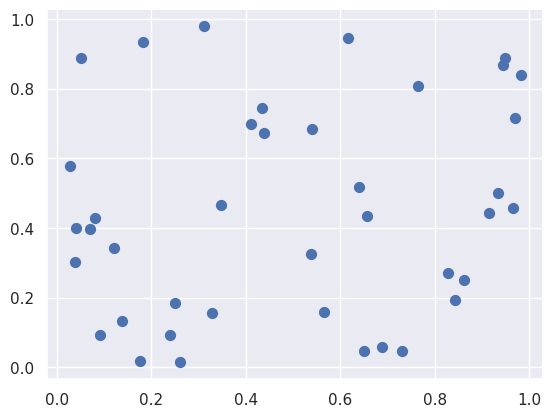

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=50);

In [21]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

In [22]:
# showing nearest neighbours: 

nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[ 0 15 18 ... 39 34  5]
 [ 1 22 29 ... 19 11 25]
 [ 2 18 15 ... 39 34  5]
 ...
 [37  3 16 ... 35 28 30]
 [38 31 16 ... 35 28 30]
 [39 34  5 ... 35 30 28]]


In [23]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

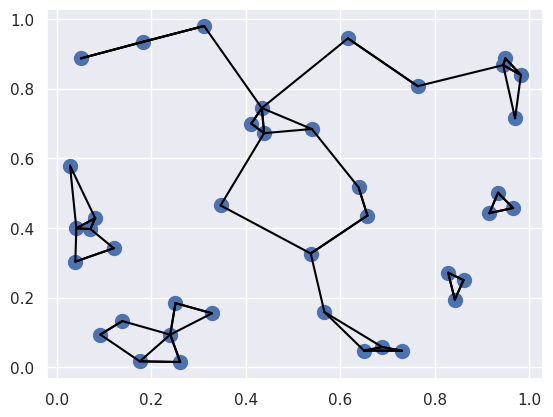

In [24]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')
        